# Extended Graham scan algorithm

Use the cell below for all python code needed to realise the extended Graham scan algorithm (including any auxiliary data structures and functions you might need). The `extendedgrahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

# Stack Implementation

In [1]:
class Stack:
    stack = []

    def __init__(self):
        self.stack = []
    def push(self, point):
        self.stack.append(point)
    
    def length(self):
        return len(self.stack)
        
    def peek(self):
        return self.stack[-1]

    def pop(self):
        return self.stack.pop()


# Auxiliary Methods

In [2]:
def lowestPoint(points):
    small = points[0]
    for i in range(len(points)):
        if(points[i][1] < small[1]):
            small = points[i]
        elif(points[i][1] == small[1] and points[i][0] < small[0]):
            small = points[i]
    return small

#Sort by cross product
def calculateCrossProduct(currentPoint, pointOne, pointTwo):
    return (currentPoint[0] - pointOne[0]) * (currentPoint[1] - pointTwo[1]) - (currentPoint[0] - pointTwo[0]) * (currentPoint[1] - pointOne[1]) 


#Find distance between two points
def distance(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**(1/2)


def merge(left, right, lowest):
    output = []
    
    i = 0
    j = 0
    while (i < len(left)  and j < len(right)):
        
        if left[i] == lowest:
            i+=1
            continue
        if right[j] == lowest:
            j+=1
            continue
        
        if calculateCrossProduct(lowest, left[i], right[j]) > 0:
            output.append(left[i])
            i+=1
        elif calculateCrossProduct(lowest, left[i], right[j]) == 0:
            # If the points have the same angle compared to the lowest point
            # Compare by the distance from the lowest point
            if (distance(lowest, left[i]) < distance(lowest, right[j])):
                output.append(left[i])
                i+=1
            else:
                output.append(right[j])
                j+=1
        else:
            output.append(right[j])
            j+=1
    
    while (i != len(left)):
        output.append(left[i])
        i+=1

    while (j != len(right)):
        output.append(right[j])
        j += 1

    return output


def mergeSortByAngle(input, lowest):

    length = len(input)

    if length == 1 or length == 0:
        return input
    
    mid = (length // 2)
    
    leftHalf = mergeSortByAngle(input[:mid:], lowest)
    rightHalf = mergeSortByAngle(input[mid::], lowest)

    return merge(leftHalf, rightHalf, lowest)

# Akl-Toussaint Heuristic

In [3]:
# find four points which have the smallest and the biggest x and y coordinates
def findCorners(points):
    minX = points[0]
    minY = points[0]
    maxX = points[0]
    maxY = points[0]
    for point in points:
        if point[0] < minX[0]:
            minX = point 
        elif point[0] > maxX[0]:
            maxX = point
        elif point[1] < minY[1]:
            minY = point
        elif point[1] > maxY[1]:
            maxY = point
    return [minX, maxX, minY, maxY]

#Removes any points inside of the largest quadrilateral in the set of points given
def filterPoints(points):
    minX, maxX, minY, maxY = findCorners(points)
    validPoints = []
    for point in points:
        if(calculateCrossProduct(minY, minX, point) >= 0):
            validPoints.append(point)
            continue
        if(calculateCrossProduct(maxX, maxY, point) <= 0):
            validPoints.append(point)
            continue
        if(calculateCrossProduct(minY, maxX, point) <= 0):
            validPoints.append(point)
            continue
        if(calculateCrossProduct(minX, maxY, point) >= 0):
            validPoints.append(point)
            continue
    return validPoints

# Graham Scan Implementation

In [4]:
def grahamScan(points):
    cloned_points = filterPoints(points)
    lowest = lowestPoint(cloned_points)
    # sorting ignores the lowest point, so need to add it back in as first item
    cloned_points = mergeSortByAngle(cloned_points,lowest)
    cloned_points.insert(0, lowest)
    # Push the first two points by default(lowest point and next point in sorted list by angle)
    stack = Stack()
    stack.push(cloned_points[0])
    stack.push(cloned_points[1])
    position = 2
    while position < len(cloned_points):
        firstPoint = stack.pop()
        thirdPoint = stack.pop()
        val = calculateCrossProduct(firstPoint, cloned_points[position], thirdPoint) 
        while(val < 0):
            stack.push(thirdPoint)
            firstPoint = stack.pop()
            thirdPoint = stack.pop()
            val = calculateCrossProduct(firstPoint, cloned_points[position], thirdPoint)
        stack.push(thirdPoint)
        stack.push(firstPoint)
        stack.push(cloned_points[position])
        position += 1
    return stack.stack


# Unmerge
mix up the sorted angle points to make the worst case possible that results in the maximum
merges when sorted by mergeSortByAngle


In [5]:
def seperate(points):
    if len(points) < 2:
        return points
    
    if len(points) == 2:
        temp = points[0]
        points[0] = points[1]
        points[1] = temp
        return points
        
    left = []
    right = []

    for i in range(0,len(points),2):
        left.append(points[i])
    for i in range(1, len(points),2):
        right.append(points[i])
    left = seperate(left)
    right = seperate(right)
    return mergeBack(left, right)

def mergeBack(left, right):
    points = []
    mid = len(points) // 2
    for i in range(len(left)):
        points.append(left[i])
    
    for i in range(len(right)):
        points.append(right[i])
    return points

# Points Generation

In [6]:
import random


#code for worst case scenario point generation
def genWorstPoints(inputSet, size):
    points = genAveragePoints(inputSet, size)
    lowest = lowestPoint(points)
    points = mergeSortByAngle(points, lowest)
    points = seperate(points)
    points.insert(0,lowest)
    return points


#code for random data generation
def genAveragePoints(inputSet, size):
    for i in range(size):
        x = [random.randint(0,32767), random.randint(0,32767)]
        while x in inputSet:
            x = [random.randint(0,32767), random.randint(0,32767)]
        inputSet.append(x)
    return inputSet


#test code
target_points = [100, 500, 1000, 5000, 10000, 15000, 20000]
random_amount = 5

def generateListOfWorstPoints(target_points, random_amount):
    results = [[[] for _ in range(random_amount)] for _ in range(len(target_points))]
    for index, target_point in enumerate(target_points):
        for i in range(0, 5):
            results[index][i] = genWorstPoints([], target_point)
    return results
    
def generateListOfAveragePoints(target_points, random_amount):
    results = [[[] for _ in range(random_amount)] for _ in range(len(target_points))]
    for index, target_point in enumerate(target_points):
        for i in range(0, 5):
            results[index][i] = genAveragePoints([], target_point)
    return results


worstPointsList = generateListOfWorstPoints(target_points,random_amount)

averagePointsList = generateListOfAveragePoints(target_points, random_amount)



# Driver Code for Testing

In [7]:
import timeit

num_of_repeats = 1 # how many times to run the test (timeit runs)
num_of_test_per_repeat = 1 # how many times to run the test for timeit

def calcAverage(results, random_amount):
    total = 0
    for result in results:
        total += result
    return total / random_amount


#test code
def performTestWithData(repeats,repeatsPerRun, random_amount, pointsList):
    for pointsGroup in pointsList:
        results = []
        for pointSet in pointsGroup:
            t = timeit.Timer(lambda: grahamScan(pointSet))
            results += t.repeat(repeats, repeatsPerRun)
        avg = calcAverage(results, random_amount)
        
        print("Amount of points is " + str(len(pointSet)) + ", avg time per run is " + str(avg))



print("Average Tests\n")
performTestWithData(num_of_repeats,num_of_test_per_repeat,random_amount, averagePointsList)
print("\n")
print("Worst Tests\n")
performTestWithData(num_of_repeats,num_of_test_per_repeat, random_amount, worstPointsList)

Average Tests

Amount of points is 100, avg time per run is 0.000735077599529177
Amount of points is 500, avg time per run is 0.00489579180139117
Amount of points is 1000, avg time per run is 0.007896598405204713
Amount of points is 5000, avg time per run is 0.06628483938402496
Amount of points is 10000, avg time per run is 0.11362749520340003
Amount of points is 15000, avg time per run is 0.20020604300661943
Amount of points is 20000, avg time per run is 0.23210124759934841


Worst Tests

Amount of points is 100, avg time per run is 0.000885923602618277
Amount of points is 500, avg time per run is 0.005567915999563411
Amount of points is 1000, avg time per run is 0.011238638195209205
Amount of points is 5000, avg time per run is 0.05908020680071786
Amount of points is 10000, avg time per run is 0.11885140520753339
Amount of points is 15000, avg time per run is 0.23034527259878815
Amount of points is 20000, avg time per run is 0.2935788389935624


*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

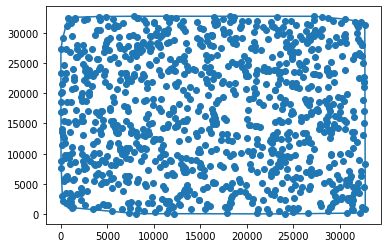

In [8]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

inputSet = genAveragePoints([], 1000)
outputSet = grahamScan(inputSet)

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b41ac805-e808-4b29-bba5-591b97a0efec' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>